# R（ggplot, patchwork）によるグラフ描画

グラフのサイズを変更する，複数のグラフを並べるといった例について紹介する．

## ライブラリの読み込み
データ分析・グラフ描画のライブラリに加えて，複数のグラフを並べるためのライブラリ（patchwork）を読み込む．


In [1]:
library("tidyverse")

install.packages("patchwork")
library(patchwork)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## グラフのサイズを変更する

※ ここでのグラフのサイズ設定は，ColaboratoryやJupyter NotebookでRを利用する場合に限ります．

``options(repr.plot.width=6, repr.plot.height=4)``といった形でグラフのサイズ（形状）を設定できます．

デフォルト値は，``width, height``ともに7です．

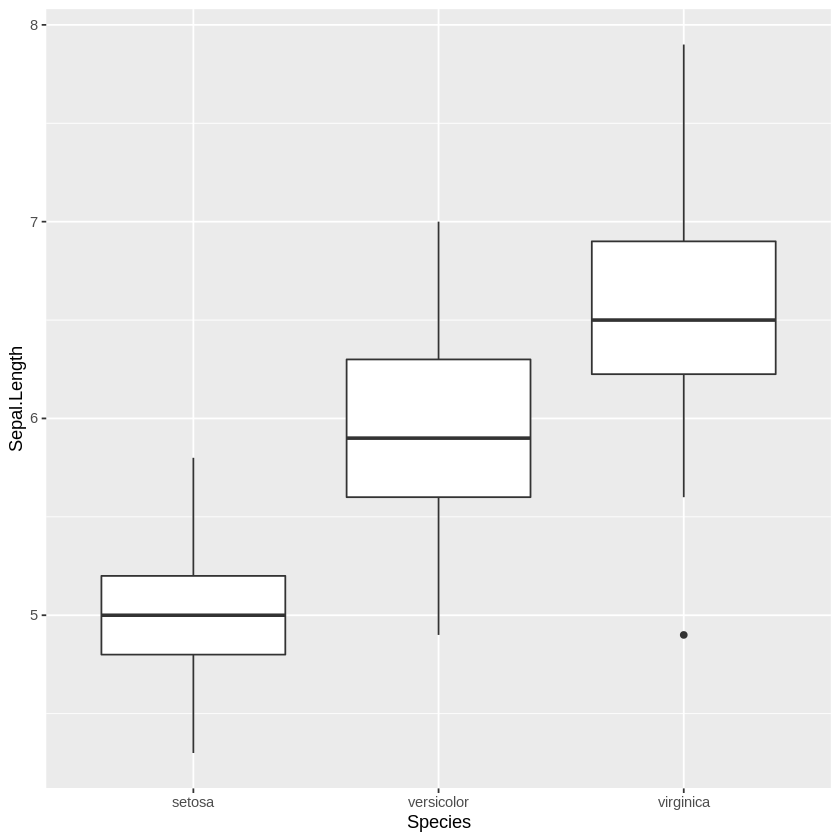

In [2]:
ggplot(data=iris, mapping=aes(x=Species, y=Sepal.Length)) +
geom_boxplot()

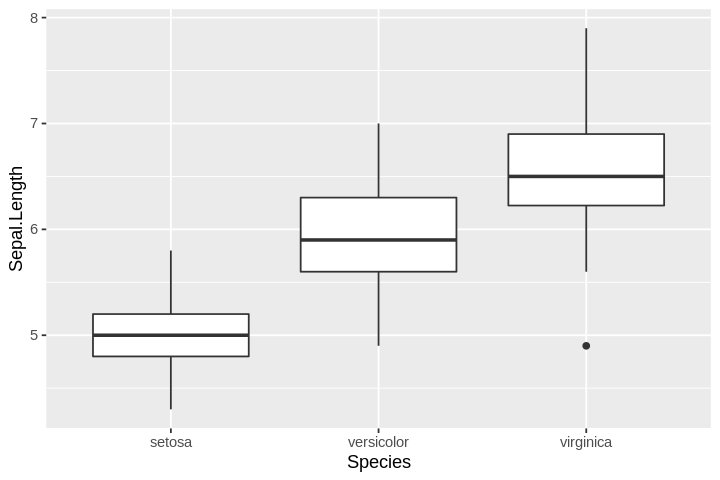

In [3]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(data=iris, mapping=aes(x=Species, y=Sepal.Length)) +
geom_boxplot()

## 複数グラフを並べる

patchworkライブラリではグラフを並べるための演算子が定義されている．プロットを変数に代入し，それらの演算子を用いて組み合わせることで，グラフを適切に並べることができる．

まず，並べたいグラフを変数に代入しておく。

In [4]:
# 箱ひげ図
p1 <- ggplot(data=iris, mapping=aes(x=Species, y=Sepal.Length)) +
geom_boxplot()

# バイオリンプロット
p2 <- ggplot(data=iris, mapping=aes(x=Species, y=Sepal.Length)) +
geom_violin()

# 散布図
p3 <- ggplot(data=iris, mapping=aes(x=Sepal.Length, y=Sepal.Width)) +
geom_point()

以下のように，``|``を使うとグラフが横に並ぶ．

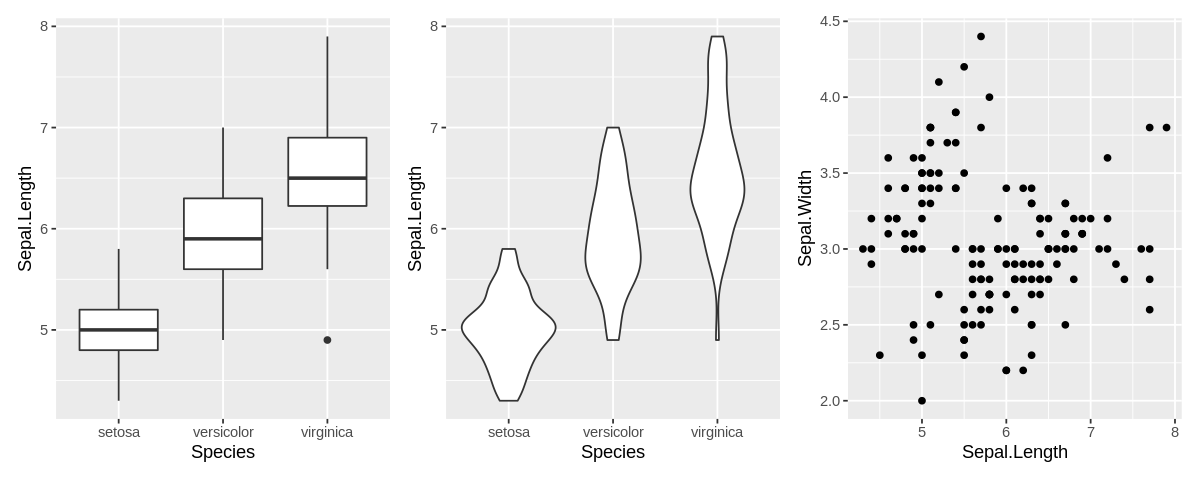

In [5]:
options(repr.plot.width=10, repr.plot.height=4)
p1|p2|p3

``/``を使うとグラフが縦に並ぶ．

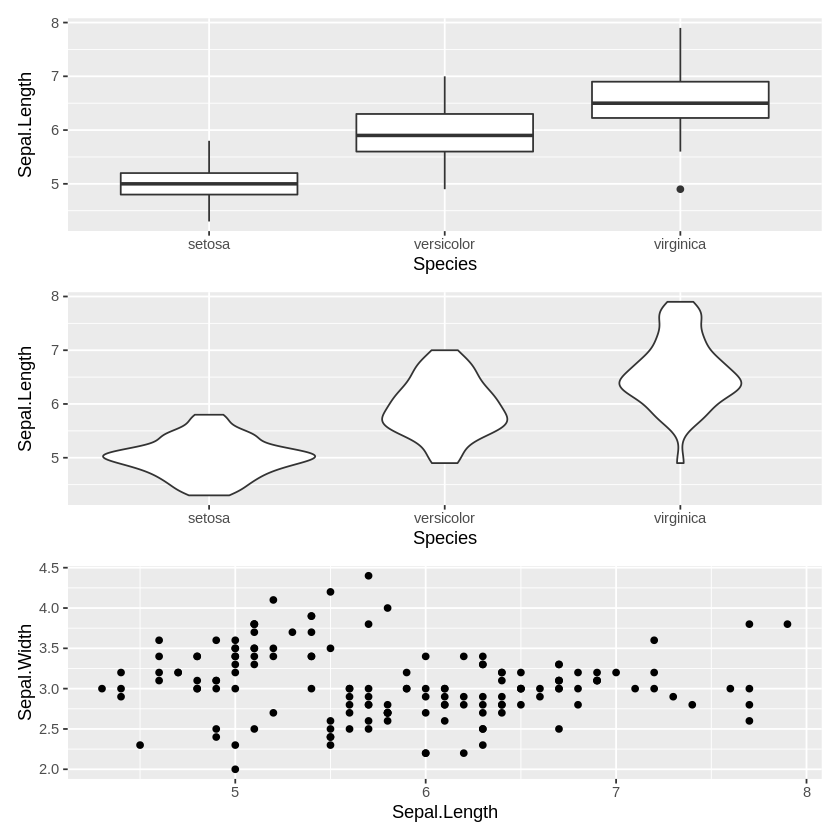

In [6]:
options(repr.plot.width=7, repr.plot.height=7)
p1/p2/p3

``|``と``/``を使うことで，複雑にグラフを並べることができる．その際，場合によっては``()``も使う必要がある．

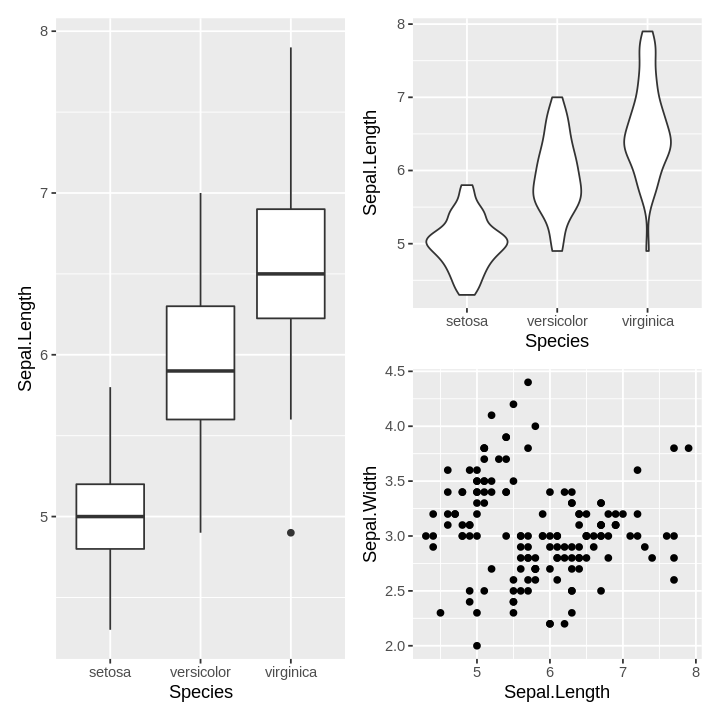

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
p1|p2/p3

``(p1|p2)/p3``とすると，``p1``と``p2``が上，``p3``が下のグラフとなる．

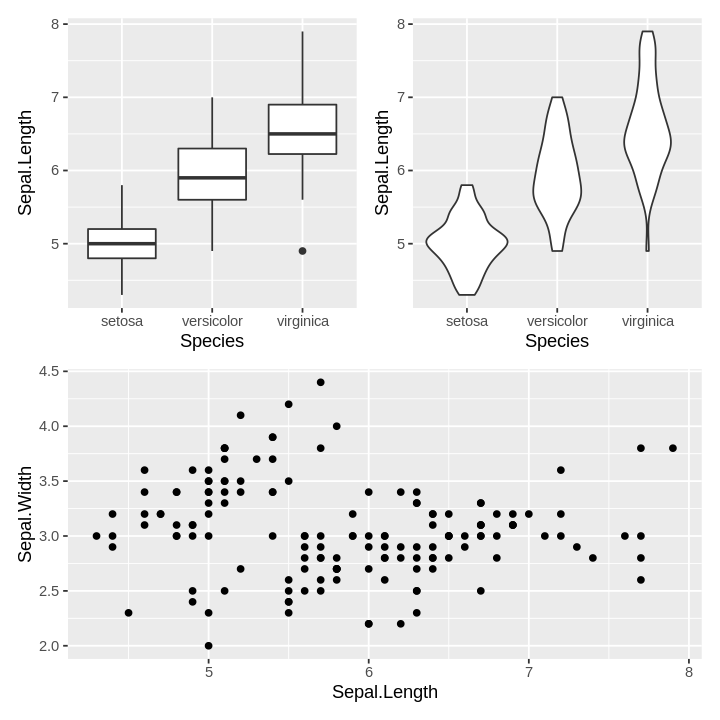

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
(p1|p2)/p3

``patchwork``については，以下のリンクなども参考にしてください．

``+``を使って組み合わせるというのが，基本の使い方のようですが，複数グラフを並べたいだけであれば，``|``と``/``を使う方が簡単だと思います．

https://patchwork.data-imaginist.com/articles/patchwork.html

